<h3>1. Обрати реальні дані з kaggle або сгенерувати випадкові дані. Дані мають відповідати вимогам викладеним вище.</h3>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from math import sqrt

In [2]:
data = pd.DataFrame({
    "Math":[169.8, 190.2, 135.4, 173.5, 182.6],
    "English":[173.3, 198.1, 167.8, 160.2, 180.9]
})

n = data.shape[0]
data

,Math,English
0,169.8,173.3
1,190.2,198.1
2,135.4,167.8
3,173.5,160.2
4,182.6,180.9


<h3>2. Побудувати графік, що відображає розкид даних в групах.</h3>

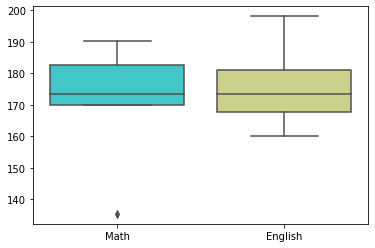

In [3]:
sns.boxplot(data=data, palette='rainbow')

<h1>3. Написати функції:</h1>

<h3>4. для оцінки зв'язку між групами за коефіцієнтом кореляції Пірсона. Функція має повертати значення коефіцієнту кореляції, значення ступеня свободи та результат оцінки значимості зв'зку (significant або not significant).</h3>

In [4]:
def pirsonfunc(data):
    r = 0
    first = n*(sum(data.iloc[:,0]*data.iloc[:,1]))-(sum(data.iloc[:,0])*sum(data.iloc[:,1]))
    second = sqrt((n*sum(data.iloc[:,0]**2)-sum(data.iloc[:,0])**2)*(n*sum(data.iloc[:,1]**2)-sum(data.iloc[:,1])**2))
    
    r = first/second
    df = data.shape[0]-2
    c = pd.read_excel("Таблиця критичних значень кореляційного аналізу.xlsx").iloc[df-1, 1]
    
    print("Значення коефіцієнта кореляції: ", r)
    print("Число ступенів свободи: ", df)
    
    znach = ""
    
    if r > c:
        print("Significant: " + str(r)+"(дано)" + " > "+ str(c)+"(табличне)")
        znach = "significant"
    else:
        print("Not significant: "+ str(r)+"(дано)" + " < "+ str(c)+"(табличне)")
        znach = "not significant"
    
    ans = [r, df, znach]
    return ans

<h3>5. для визначення відмінності між групами за критерієм Стьюдента. Функція має повертати значення критерію Стьюдента,значення ступеня свободи та результат оцінки значимості зв'зку (significant або not significant).</h3>

In [5]:
def t_student(data):
    data['Різниця(d)'] = None
    data['Різниця(d)'] = (data.iloc[:,0] - data.iloc[:,1])
    Md = sum(data.iloc[:,2])/n
    sum_d = 0
    for i in range(n):
        sum_d += (data.iloc[i, 2] - Md)**2
    sigmaD = sqrt(sum_d/n)
    
    t = (Md/sigmaD) * sqrt(n)
    df = data.shape[0] - 1
    c = pd.read_excel("Таблица критических значений для парного критерия.xlsx").iloc[df-1, 1]
    print("Значення t-критерію Стьюдента: ", t)
    print("Число ступенів свободи: ", df)
    
    znach = ""
    
    if t > c:
        print("Significant: " + str(t)+"(дано)" + " > "+ str(c)+"(табличне)")
        znach = "significant"
    else:
        print("Not significant: "+ str(t)+"(дано)" + " < "+ str(c)+"(табличне)")
        znach = "not significant"
    
    ans = [t, df, znach]
    return ans

<h3>6. Перевірити розбіжність на між групами на даних з п. 1.</h3>

In [8]:
pirsonfunc(data)
print("\n-----------------------------------------------\n")
t_student(data)

Значення коефіцієнта кореляції:  0.6046951391415942
Число ступенів свободи:  3
Not significant: 0.6046951391415942(дано) < 0.8783(табличне)

-----------------------------------------------

Значення t-критерію Стьюдента:  -0.8536145924000886
Число ступенів свободи:  4
Not significant: -0.8536145924000886(дано) < 2.776(табличне)


[-0.8536145924000886, 4, 'not significant']

<h3>7. Сформувати висновок про взаємозв'язок між групами та про їх розбіжність.</h3>

Висновок: Статистичної залежності між двома групами немає. Різниця між середніми у групах за показником, який досліджується, дорівнює нулю і це свідчить про рівність даних.